<a href="https://colab.research.google.com/github/Pooja-SenthilKumar/model/blob/main/fashion%20mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
     

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')
     

Import the Fashion MNIST dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
     

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
     

Explore the data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
np.unique(train_labels)
     

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Test dataset

In [ ]:
test_images.shape
     

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

Preprocessing

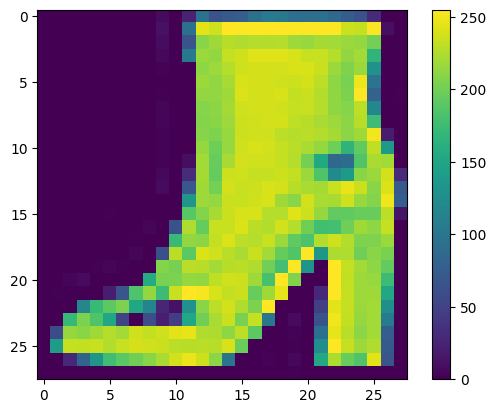

In [ ]:
plt.figure()
plt.imshow(train_images[88])
plt.colorbar()
plt.grid(False)
plt.show()
     


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Build and compile the model

In [ ]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])
     

In [ ]:
model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
     

In [ ]:
model.fit(train_images, train_labels, epochs=15)
     

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4950 - accuracy: 0.8264
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3749 - accuracy: 0.8638
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3328 - accuracy: 0.8778
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3106 - accuracy: 0.8856
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2911 - accuracy: 0.8930
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2771 - accuracy: 0.8980
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2540 - accuracy: 0.9049
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2452 - accuracy: 0.9083
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.236

In [ ]:
KERAS_MODEL_NAME = "tf_fashion.h5"

In [ ]:
model.save(KERAS_MODEL_NAME)
     

Inference time of tensorflow model

In [ ]:
model = tf.keras.models.load_model('tf_fashion.h5')


In [ ]:
_ = model.predict(test_images[:1])

1/1 [==============================] - 0s 31ms/step


In [ ]:
start_time = time.time()
output = model.predict(test_images[:1])
end_time = time.time()
inference_time = end_time - start_time

print('Inference time:', inference_time)

1/1 [==============================] - 0s 22ms/step
Inference time: 0.0709688663482666


Size and accuracy of tensorflow model

In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File size: 1.189 Megabytes


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
     

313/313 - 1s - loss: 0.3446 - accuracy: 0.8830 - 873ms/epoch - 3ms/step

Test accuracy: 0.8830000162124634


Tflite Model

In [ ]:
sTF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"
     

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
     

In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
     


408864

Size of Tflite model

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")
     

File size: 399.281 Kilobytes


Check input tensor shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])
     

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


Resize tensor shape

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])
     

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [ ]:
test_images.dtype

dtype('float64')

In [ ]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
     

Prediction results shape: (10000, 10)


In [ ]:
interpreter = tf.lite.Interpreter(model_path='tf_lite_model.tflite')
interpreter.allocate_tensors()

Inference Time of tflite model

In [ ]:
    start_time = time.time()
    interpreter.invoke()
    end_time = time.time()
    inference_time = end_time - start_time
    inference_times.append(inference_time)

print('Average inference time:', sum(inference_times) / len(inference_times))

Average inference time: 0.000741124153137207


Accuracy of Tflite model

In [ ]:
acc = accuracy_score(prediction_classes, test_labels)
     

In [ ]:
print('Test accuracy TFLITE model :', acc)
     

Test accuracy TFLITE model : 0.883
